# 3 Exploratory Data Analysis (EDA)

## Summary from notebook 2
The target feature is the sale price of each Non-fungible Token (NFT).   
Each row is a unique token.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date

from bs4 import BeautifulSoup
import requests

pd.options.display.max_colwidth = 200

In [2]:
def ecdf(data):
    """Compute Empirical Cumulative Distribution Function (ECDF) for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n + 1) / n

    return x, y

In [3]:
filepath = "../data/processed/"
df = pd.read_csv(filepath + 'nft_combined.csv',index_col = 0)

In [4]:
df.shape

(32949, 18)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32949 entries, 0x3b3ee1931dc30c1957379fac9aba94d1c48a5405-24437 to 0x3b3ee1931dc30c1957379fac9aba94d1c48a5405-90639
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   n_isFirstSale         32949 non-null  bool   
 1   n_lastSalePriceInETH  32949 non-null  float64
 2   n_revenue             32949 non-null  float64
 3   n_tokenIPFSPath       32949 non-null  object 
 4   n_date_minted         32949 non-null  object 
 5   n_rs_ratio            32949 non-null  float64
 6   c_id                  32949 non-null  object 
 7   c_revenue             32949 non-null  float64
 8   c_sales               32949 non-null  float64
 9   c_rs_ratio            32949 non-null  float64
 10  m_name                32949 non-null  object 
 11  m_desc                32949 non-null  object 
 12  m_img                 32949 non-null  object 
 13  n_bid_count           32949 non-null

In [6]:
df.head(3)

,n_isFirstSale,n_lastSalePriceInETH,n_revenue,n_tokenIPFSPath,n_date_minted,n_rs_ratio,c_id,c_revenue,c_sales,c_rs_ratio,m_name,m_desc,m_img,n_bid_count,n_bid_max,n_list_max,n_bid_mean,n_bid_min
n_id,,,,,,,,,,,,,,,,,,
0x3b3ee1931dc30c1957379fac9aba94d1c48a5405-24437,False,2224.0000,1890.40000,QmNeqUFf3WKcXFEHgxFCrf3t8jrxyCkev6LBtRz78Ygq9u/metadata.json,2021-04-14 22:13:06,0.85,0xf74d1224931afa9cf12d06092c1eb1818d1e255c,1890.400000,2224.0000,0.850000,"Stay Free (Edward Snowden, 2021)","This unique, signed work combines the entirety of a landmark court decision ruling the National Security Agency's mass surveillance violated the law, with the iconic portrait of the whistleblower ...",ipfs://QmTKdyzYbT9FzAs8mB4HGiLDR7o8maRP34J5iNDFZQqndQ/nft.png,31.0,2224.0000,2.0,552.849126,2.0
0x3b3ee1931dc30c1957379fac9aba94d1c48a5405-100052,False,49.5002,42.07517,QmaW2ukMCqyMNg5qqoYsusgbNL9KRnFwRKCkBt6u3AiyTN/metadata.json,2021-10-19 04:56:48,0.85,0x4666fd1f89576e2d6fb3f2ecec5eefd3e1ba6b59,1329.278945,1624.6517,0.818193,PORTAL 07,Possession of this PORTAL entitles you to membership in the TBOA club (theblocksofart.com)\n\n10000x10000,ipfs://QmYChA4jtLhiMLPhDZv1t3xGZ1uj46yG4dtzCygUjgdhz7/nft.png,8.0,49.5002,0.1,29.538775,0.1
0x3b3ee1931dc30c1957379fac9aba94d1c48a5405-100995,False,33.0000,3.30000,QmdCKx9Q5b1G4vjbJ2wKSkCo3sWoUrg2hm5QTifNag5nXj/metadata.json,2021-10-21 05:35:05,0.10,0x4666fd1f89576e2d6fb3f2ecec5eefd3e1ba6b59,1329.278945,1624.6517,0.818193,PORTAL 08,Possession of this PORTAL entitles you to membership in the TBOA club (tboa.club)\n\n444(4) Edition\n\n10000x10000,ipfs://Qmbd3CzQMBPYeYBiMWe7U2bTWCyRusEjcMB3Ck84LcDbGc/nft.png,1.0,33.0000,33.0,33.000000,33.0


## 3.1 Feature engineering and data type cleaning

#### Convert date_minted into year, month, and day columns

In [7]:
df.n_date_minted = pd.to_datetime(df['n_date_minted'])

In [8]:
# 5 date related columns derived from 'n_date_minted', which is then removed
df['minted_year'] = df['n_date_minted'].dt.year
df['minted_month'] = df['n_date_minted'].dt.month
df['minted_day'] = df['n_date_minted'].dt.day
df['minted_hour'] = df['n_date_minted'].dt.hour
df['minted_minute'] = df['n_date_minted'].dt.minute
df.drop('n_date_minted', axis = 1, inplace = True)

#### Extraction of feature 'file_type' from 'm_img', which is the image metadata

In [9]:
col = df.m_img
n = len(df.m_img)
delimiter = "."

file_type_list = []

def substring_after(s,delim):
    return s.partition(delim)[2]

for i in range(n):
    file_type_list += [substring_after(col[i],".")]

In [10]:
df['file_type'] = file_type_list

In [11]:
df.file_type.value_counts()

mp4     14516
jpg     11798
png      6255
glb       227
gif       105
gltf       34
            9
mov         4
svg         1
Name: file_type, dtype: int64

In [12]:
# Creating categorical bins for file type
ft = df['file_type']

ft_counts = ft.value_counts()

mask = ft.isin(ft_counts[ft_counts<1000].index)

ft[mask] = 'Other'

df['file_type']  = ft

df.file_type.value_counts()

C:\Users\andre\AppData\Local\Temp/ipykernel_31140/2587327144.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ft[mask] = 'Other'


mp4      14516
jpg      11798
png       6255
Other      380
Name: file_type, dtype: int64

In [13]:
# perform dummy encoding for file_type
df = pd.get_dummies(df, columns = ['file_type'], drop_first = True, prefix = 'FT')

#### Create new features: length of name and description

In [14]:
df['m_name_len'] = df.m_name.str.len()
df['m_desc_len'] = df.m_desc.str.len()

Finally, string columns are removed for further analysis later.

In [15]:
df_full = df
df.drop(["n_tokenIPFSPath", "c_id", "m_name", "m_desc","m_img"], axis = 1, inplace = True)
n_base = len(df)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32949 entries, 0x3b3ee1931dc30c1957379fac9aba94d1c48a5405-24437 to 0x3b3ee1931dc30c1957379fac9aba94d1c48a5405-90639
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   n_isFirstSale         32949 non-null  bool   
 1   n_lastSalePriceInETH  32949 non-null  float64
 2   n_revenue             32949 non-null  float64
 3   n_rs_ratio            32949 non-null  float64
 4   c_revenue             32949 non-null  float64
 5   c_sales               32949 non-null  float64
 6   c_rs_ratio            32949 non-null  float64
 7   n_bid_count           32949 non-null  float64
 8   n_bid_max             32949 non-null  float64
 9   n_list_max            32949 non-null  float64
 10  n_bid_mean            32949 non-null  float64
 11  n_bid_min             32949 non-null  float64
 12  minted_year           32949 non-null  int64  
 13  minted_month          32949 non-null

## 3.2 Exploring distributions and outlier identification

#### Target feature
Distributions of each feature was explored, beginning with the target feature : "n_lastSalePriceInETH".
The distribution of the target feature, "Last Sale Price of NFT", was found to be highly skewed towards 0 ETH.   
To avoid the skewing of mean and standard deviation, the outliers beyond the 95th percentile were capped and dropped.

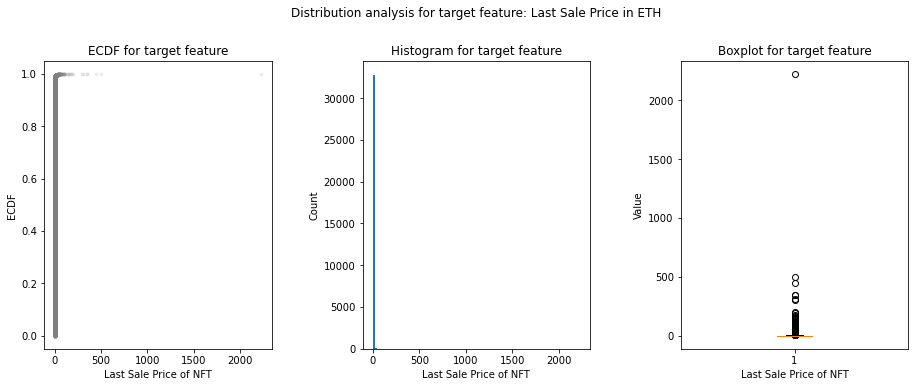

In [17]:
#compute ECDF for target
x_target, y_target = ecdf(df.n_lastSalePriceInETH.values)

fig,ax = plt.subplots(1,3,figsize = (15,5));
_ = ax[0].plot(x_target, y_target, marker='.', linestyle='none', color='gray', alpha=0.1);
_ = ax[0].set_xlabel("Last Sale Price of NFT")
_ = ax[0].set_ylabel("ECDF")
_ = ax[0].set_title("ECDF for target feature")

_ = ax[1].hist(df.n_lastSalePriceInETH,bins = 100);
_ = ax[1].set_xlabel("Last Sale Price of NFT")
_ = ax[1].set_ylabel("Count")
_ = ax[1].set_title("Histogram for target feature")

_ = ax[2].boxplot(df.n_lastSalePriceInETH);
_ = ax[2].set_xlabel("Last Sale Price of NFT")
_ = ax[2].set_ylabel("Value")
_ = ax[2].set_title("Boxplot for target feature")

_ = ax
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)
plt.suptitle("Distribution analysis for target feature: Last Sale Price in ETH", y = 1.05)
plt.show()

In [18]:
#dropping the outlier rows
upper_lim_t = df.n_lastSalePriceInETH.quantile(0.95)
number_of_rows_t = len(df.n_lastSalePriceInETH[df.n_lastSalePriceInETH > upper_lim_t])
percent_of_data_t = len(df.n_lastSalePriceInETH[df.n_lastSalePriceInETH > upper_lim_t])/ n_base*100

print('The 95th percentile of data is',upper_lim_t,'ETH, with',number_of_rows_t,'rows greater than the 95th percentile, comprising',round(percent_of_data_t,2),'% of the dataset.')

The 95th percentile of data is 3.0 ETH, with 1577 rows greater than the 95th percentile, comprising 4.79 % of the dataset.


After the outliers above the 95th percentile are dropped:

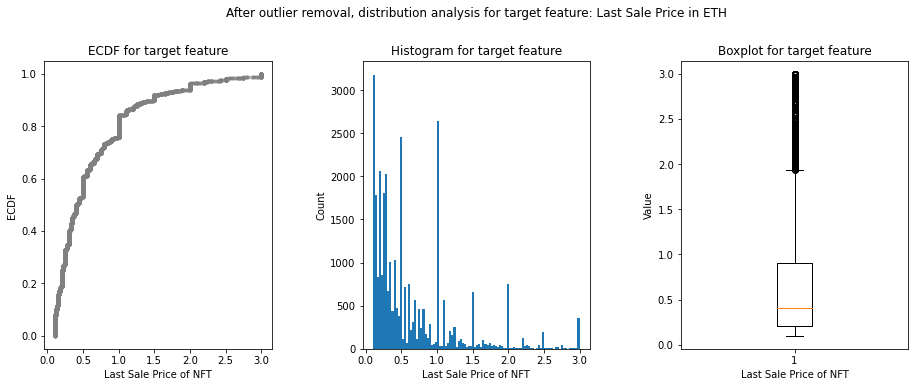

In [19]:
df = df[df.n_lastSalePriceInETH <= upper_lim_t]

x_target, y_target = ecdf(df.n_lastSalePriceInETH.values)

fig,ax = plt.subplots(1,3,figsize = (15,5));
_ = ax[0].plot(x_target, y_target, marker='.', linestyle='none', color='gray', alpha=0.1);
_ = ax[0].set_xlabel("Last Sale Price of NFT")
_ = ax[0].set_ylabel("ECDF")
_ = ax[0].set_title("ECDF for target feature")

_ = ax[1].hist(df.n_lastSalePriceInETH,bins = 100);
_ = ax[1].set_xlabel("Last Sale Price of NFT")
_ = ax[1].set_ylabel("Count")
_ = ax[1].set_title("Histogram for target feature")

_ = ax[2].boxplot(df.n_lastSalePriceInETH);
_ = ax[2].set_xlabel("Last Sale Price of NFT")
_ = ax[2].set_ylabel("Value")
_ = ax[2].set_title("Boxplot for target feature")

_ = ax
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)
plt.suptitle("After outlier removal, distribution analysis for target feature: Last Sale Price in ETH", y = 1.05)
plt.show()

#### All other features:
The same procedure is repeated for each of the other target variables to better understand their distribution:

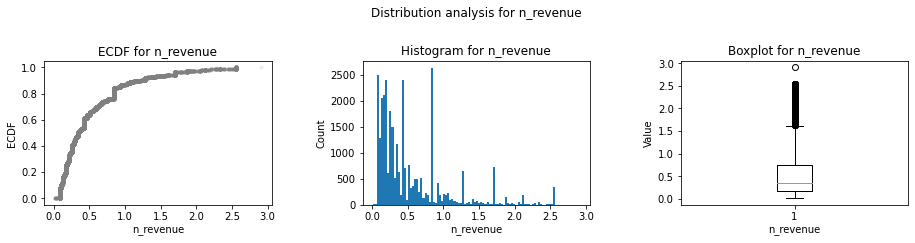

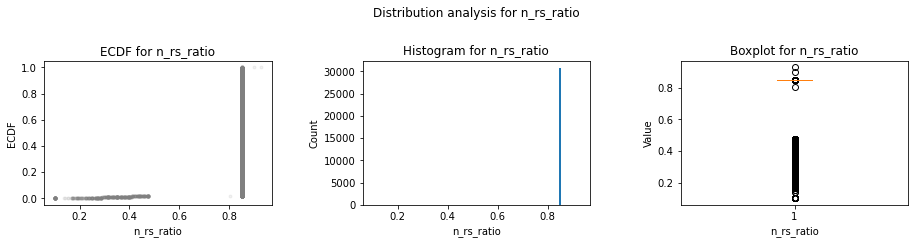

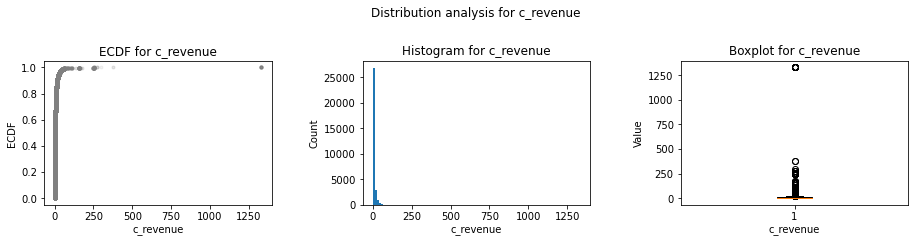

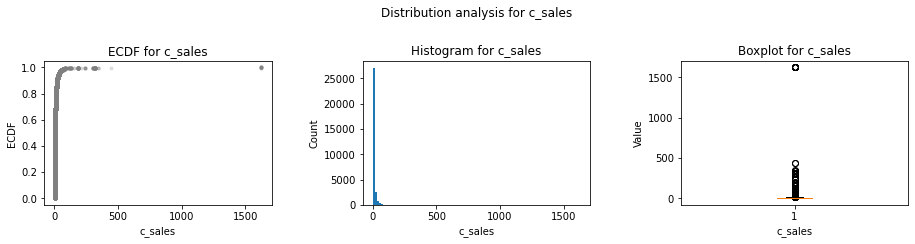

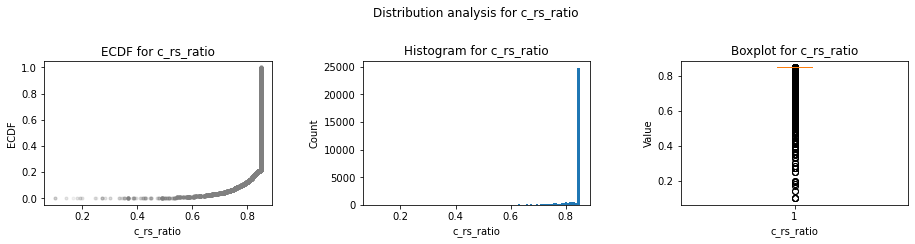

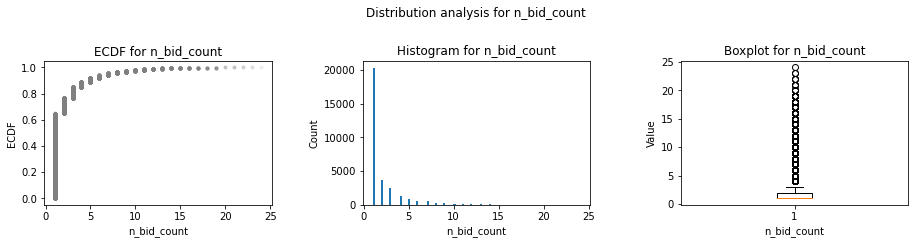

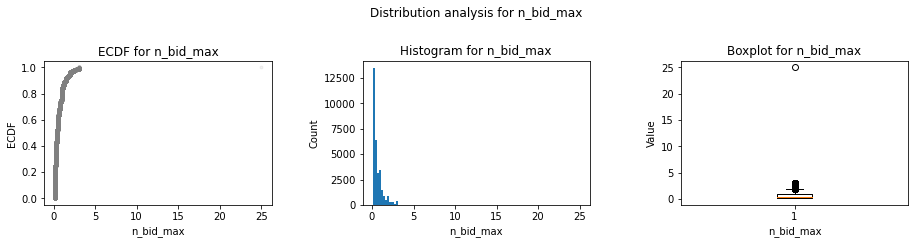

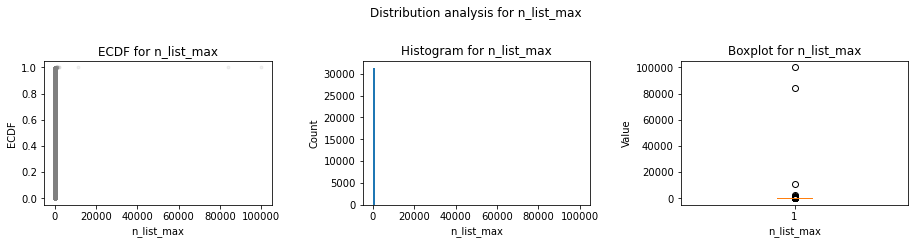

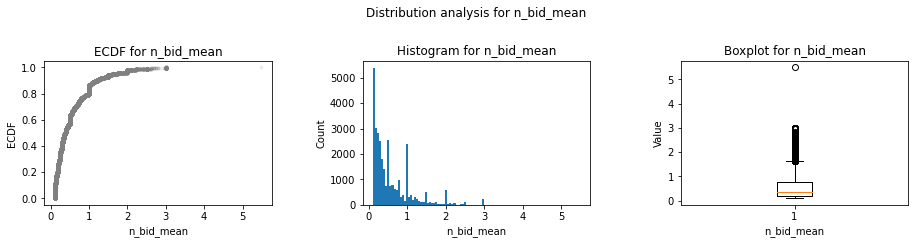

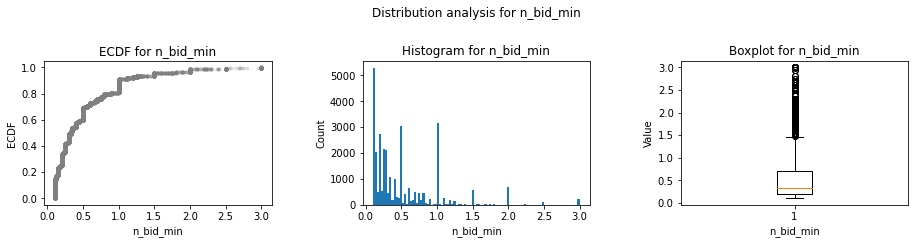

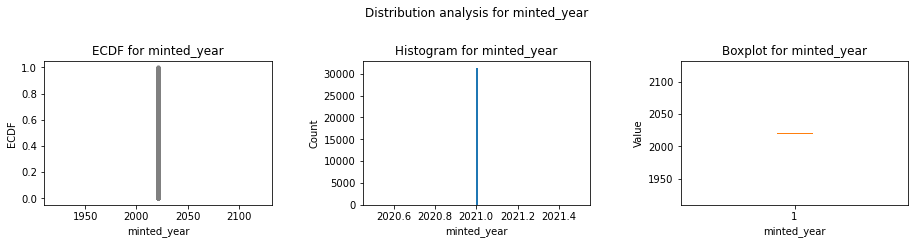

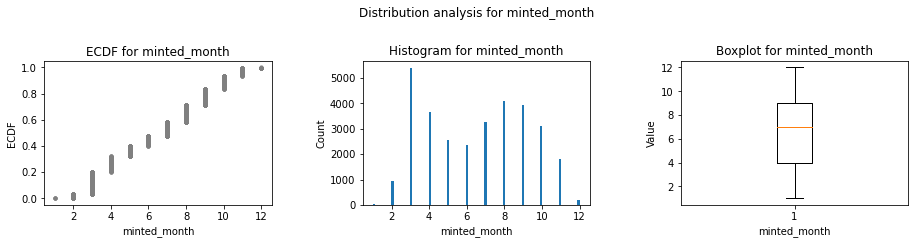

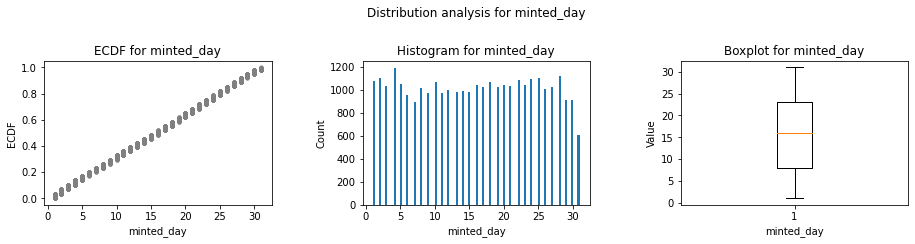

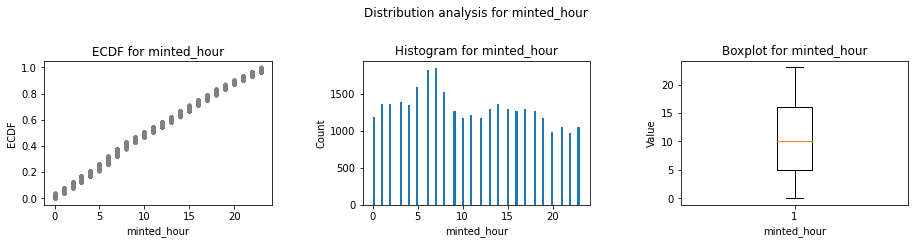

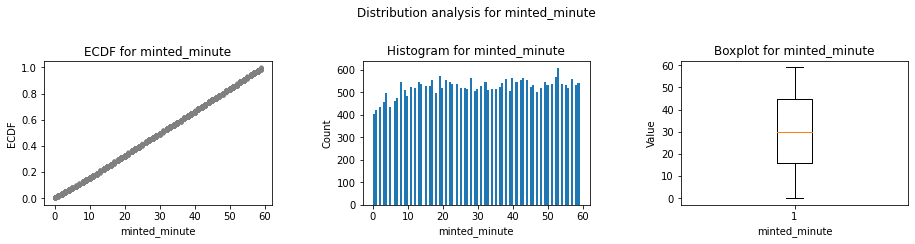

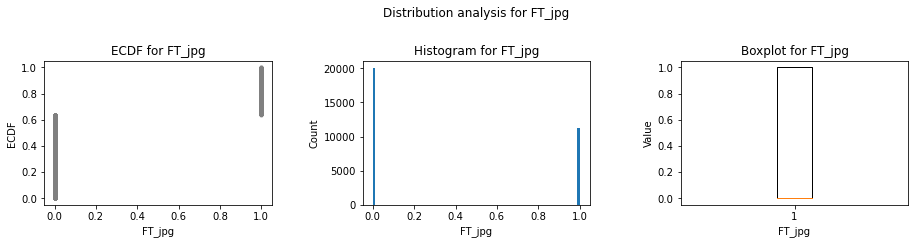

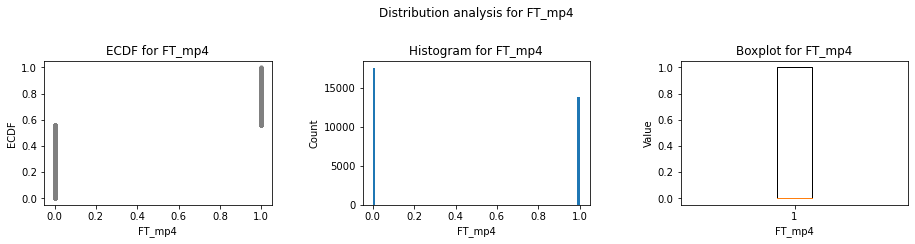

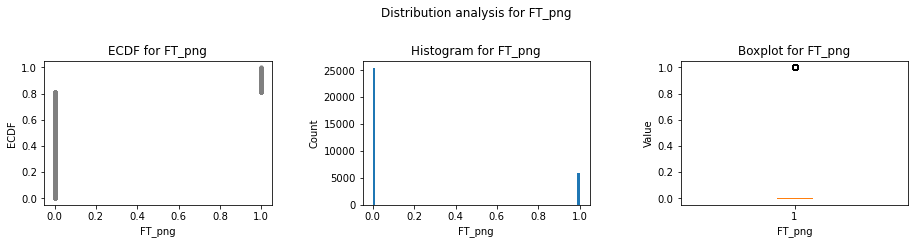

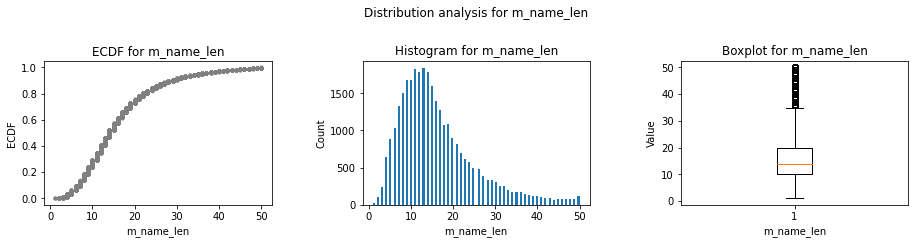

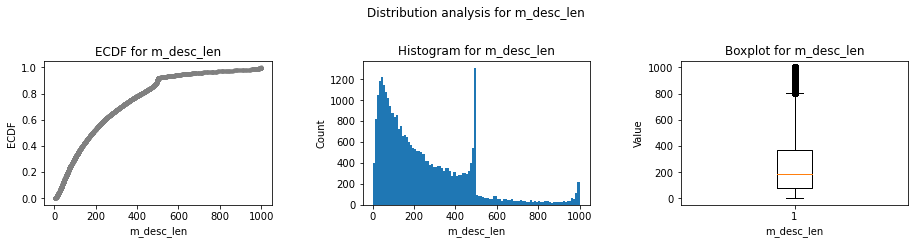

In [20]:
plot_columns = df.drop(["n_isFirstSale", "n_lastSalePriceInETH"], axis =1).columns

n = len(plot_columns)
for i in range(n):
    x, y = ecdf(df[plot_columns[i]].values)
    
    fig,ax = plt.subplots(1,3,figsize = (15,5));
    
    # Plot for ECDF
    _ = ax[0].plot(x, y, marker='.', linestyle='none', color='gray', alpha=0.1);
    _ = ax[0].set_xlabel(plot_columns[i])
    _ = ax[0].set_ylabel("ECDF")
    _ = ax[0].set_title("ECDF for " + plot_columns[i])

    # Plot for Histogram
    _ = ax[1].hist(df[plot_columns[i]],bins = 100);
    _ = ax[1].set_xlabel(plot_columns[i])
    _ = ax[1].set_ylabel("Count")
    _ = ax[1].set_title("Histogram for " + plot_columns[i])

    # Plot for Boxplot
    _ = ax[2].boxplot(df[plot_columns[i]]);
    _ = ax[2].set_xlabel(plot_columns[i])
    _ = ax[2].set_ylabel("Value")
    _ = ax[2].set_title("Boxplot for " + plot_columns[i])

    _ = ax
    plt.subplots_adjust(left=0.1,
                        bottom=0.5, 
                        right=0.9, 
                        top=0.9, 
                        wspace=0.4, 
                        hspace=0.4)
    plt.suptitle("Distribution analysis for " + plot_columns[i], y = 1.05)
    plt.show()

Analyzing above distribution charts: nfts that do not display the revenue to sales ratio of 85% are considered outliers and are removed. Also, columns such as revenue_to_sales_ratio, minted_year, and revenue are also removed.

In [21]:
#dropping unusual cases (outliers) where the service fee is not 15% of sales.
upper_lim_o = "15 %" #df.n_lastSalePriceInETH.quantile(0.95)
number_of_rows_o = len(df.n_lastSalePriceInETH[df.n_rs_ratio != 0.85])
percent_of_data_o = len(df.n_lastSalePriceInETH[df.n_rs_ratio != 0.85])/ n_base*100

print('The fixed service fee charged by Foundation App is ',upper_lim_o,'of sales, with',number_of_rows_o,'rows not following this rule, comprising',round(percent_of_data_o,2),'% of the dataset.')

The fixed service fee charged by Foundation App is  15 % of sales, with 7909 rows not following this rule, comprising 24.0 % of the dataset.


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31372 entries, 0x3b3ee1931dc30c1957379fac9aba94d1c48a5405-64683 to 0x3b3ee1931dc30c1957379fac9aba94d1c48a5405-90639
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   n_isFirstSale         31372 non-null  bool   
 1   n_lastSalePriceInETH  31372 non-null  float64
 2   n_revenue             31372 non-null  float64
 3   n_rs_ratio            31372 non-null  float64
 4   c_revenue             31372 non-null  float64
 5   c_sales               31372 non-null  float64
 6   c_rs_ratio            31372 non-null  float64
 7   n_bid_count           31372 non-null  float64
 8   n_bid_max             31372 non-null  float64
 9   n_list_max            31372 non-null  float64
 10  n_bid_mean            31372 non-null  float64
 11  n_bid_min             31372 non-null  float64
 12  minted_year           31372 non-null  int64  
 13  minted_month          31372 non-null

#### Final prep before exploring correlation:

Overall:
- target feature: values beyond 95th percentile dropped (1577 rows comprising 4.79 % of the dataset)
- revenue_to_sales_ratio: values not compliant with the 15% revenue sales ratio dropped (7909 rows comprising 23.96% of the dataset)
- columns dropped: "n_revenue","n_rs_ratio","c_revenue", "c_rs_ratio", "n_list_max"

In [24]:
df = df[df.n_rs_ratio == 0.85]
df.drop(["n_isFirstSale",
         "n_revenue",
         "n_rs_ratio",
         "c_revenue", 
         "c_rs_ratio", 
         "n_bid_max",
         "n_list_max", 
         "n_bid_mean",
         "n_bid_min",
         "minted_year",
         "minted_month",
         ],axis =1, inplace = True)

print("Shape of df",df.shape)
df.info()

Shape of df (23463, 11)
<class 'pandas.core.frame.DataFrame'>
Index: 23463 entries, 0x3b3ee1931dc30c1957379fac9aba94d1c48a5405-65450 to 0x3b3ee1931dc30c1957379fac9aba94d1c48a5405-90639
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   n_lastSalePriceInETH  23463 non-null  float64
 1   c_sales               23463 non-null  float64
 2   n_bid_count           23463 non-null  float64
 3   minted_day            23463 non-null  int64  
 4   minted_hour           23463 non-null  int64  
 5   minted_minute         23463 non-null  int64  
 6   FT_jpg                23463 non-null  uint8  
 7   FT_mp4                23463 non-null  uint8  
 8   FT_png                23463 non-null  uint8  
 9   m_name_len            23463 non-null  int64  
 10  m_desc_len            23463 non-null  int64  
dtypes: float64(3), int64(5), uint8(3)
memory usage: 1.7+ MB


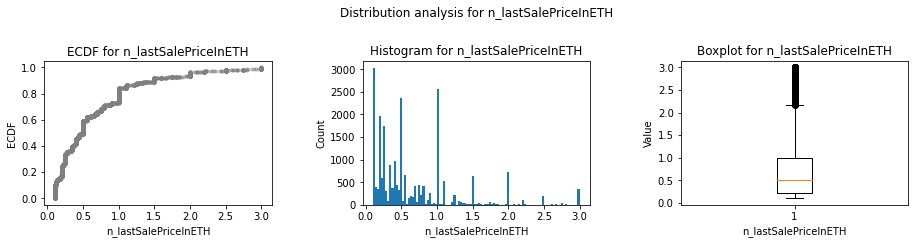

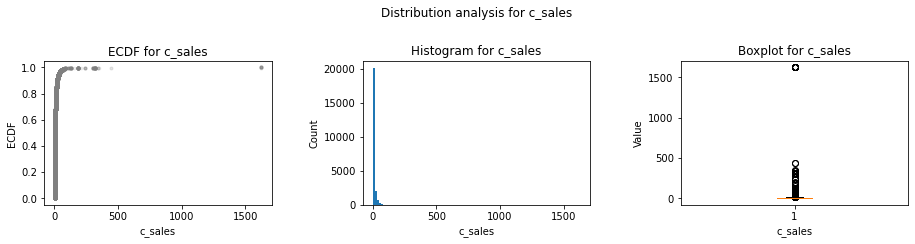

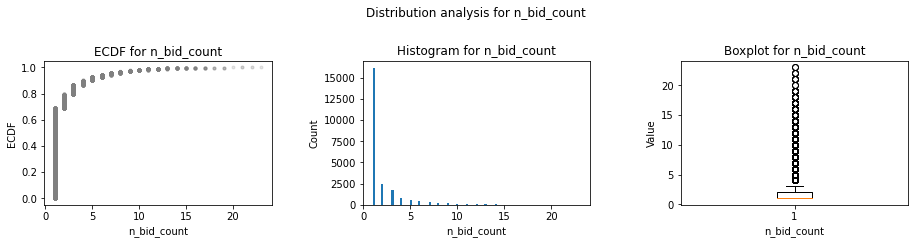

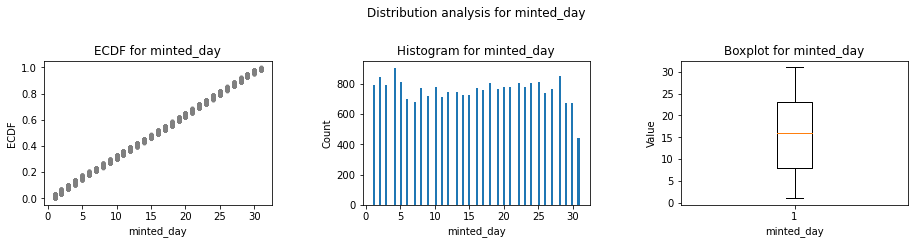

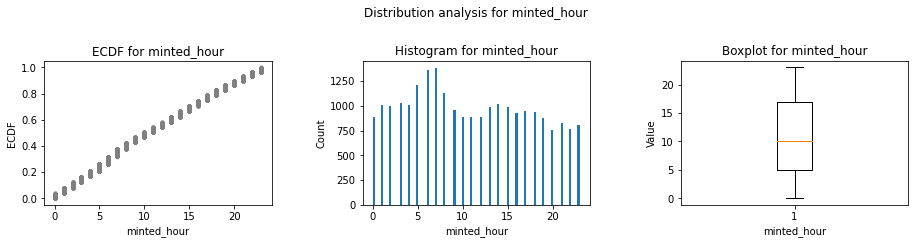

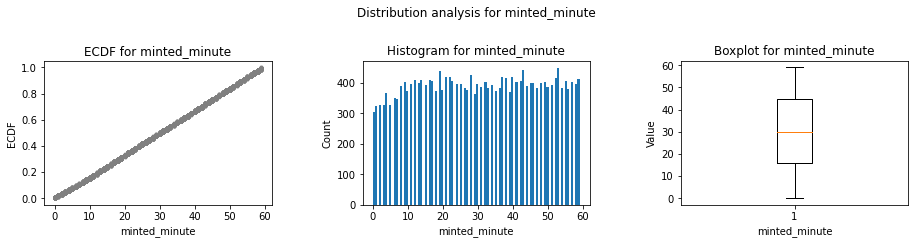

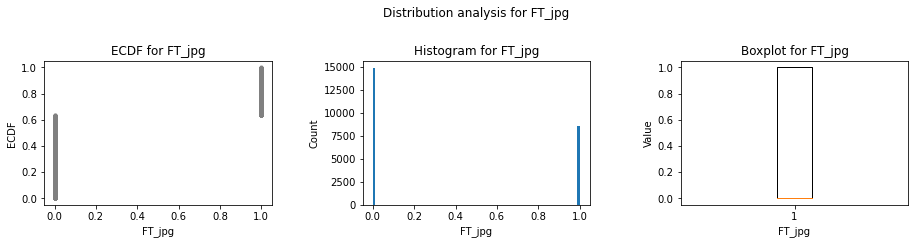

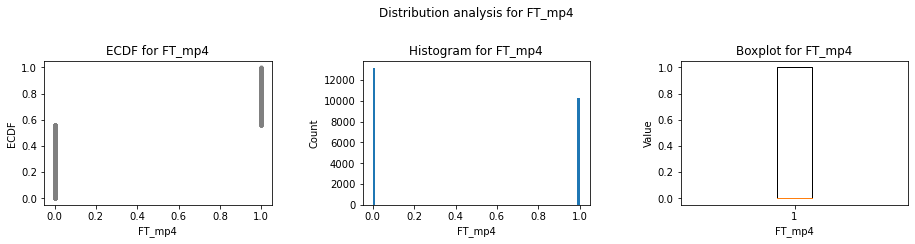

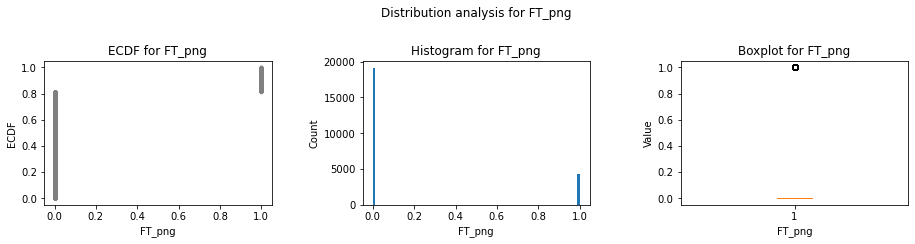

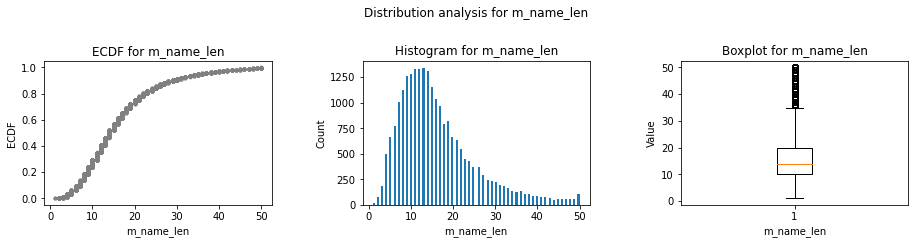

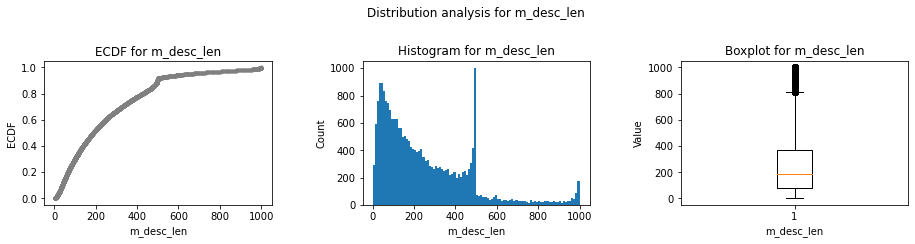

In [25]:
# Distributions
plot_columns = df.columns

n = len(plot_columns)
for i in range(n):
    x, y = ecdf(df[plot_columns[i]].values)
    
    fig,ax = plt.subplots(1,3,figsize = (15,5));
    
    # Plot for ECDF
    _ = ax[0].plot(x, y, marker='.', linestyle='none', color='gray', alpha=0.1);
    _ = ax[0].set_xlabel(plot_columns[i])
    _ = ax[0].set_ylabel("ECDF")
    _ = ax[0].set_title("ECDF for " + plot_columns[i])

    # Plot for Histogram
    _ = ax[1].hist(df[plot_columns[i]],bins = 100);
    _ = ax[1].set_xlabel(plot_columns[i])
    _ = ax[1].set_ylabel("Count")
    _ = ax[1].set_title("Histogram for " + plot_columns[i])

    # Plot for Boxplot
    _ = ax[2].boxplot(df[plot_columns[i]]);
    _ = ax[2].set_xlabel(plot_columns[i])
    _ = ax[2].set_ylabel("Value")
    _ = ax[2].set_title("Boxplot for " + plot_columns[i])

    _ = ax
    plt.subplots_adjust(left=0.1,
                        bottom=0.5, 
                        right=0.9, 
                        top=0.9, 
                        wspace=0.4, 
                        hspace=0.4)
    plt.suptitle("Distribution analysis for " + plot_columns[i], y = 1.05)
    plt.show()

## 3.3 Exploring relationships between variables

#### Pair plot of df

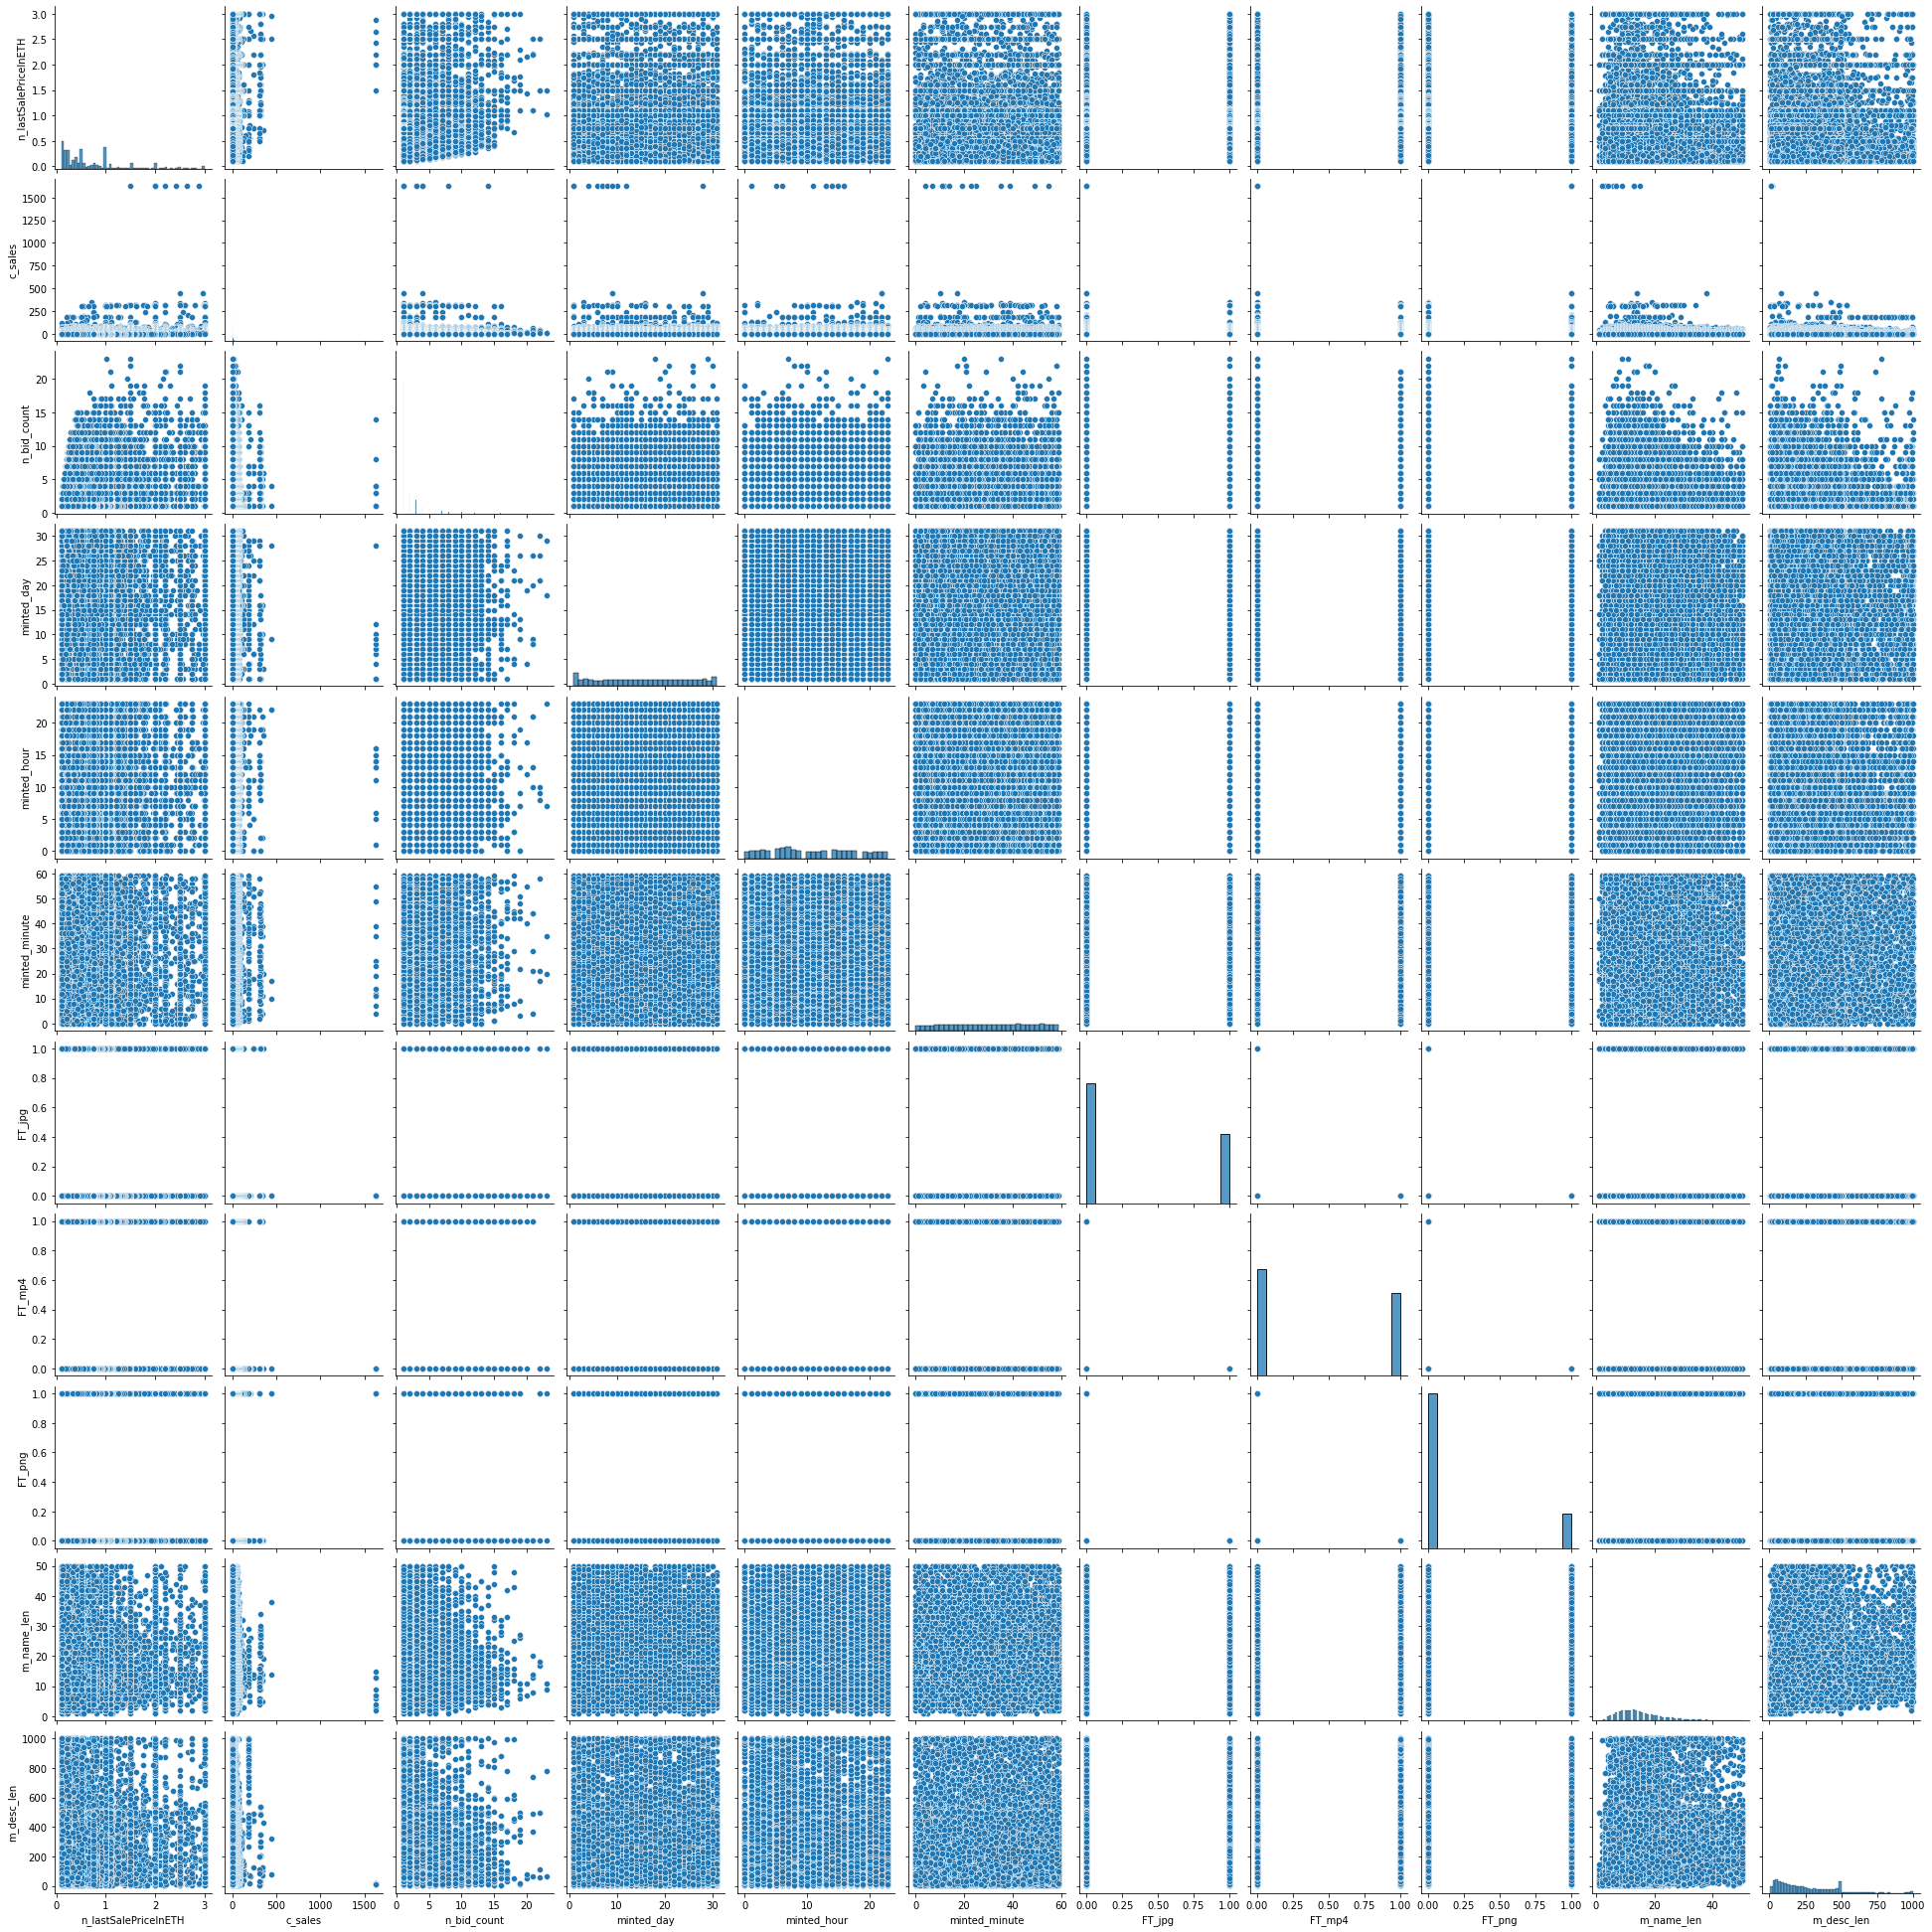

In [26]:
_ = sns.pairplot(df)

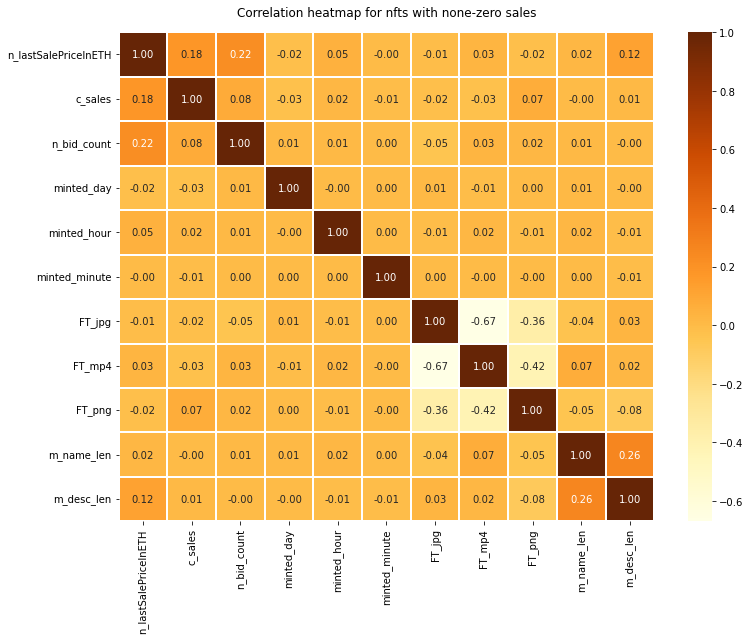

In [27]:
fig, ax = plt.subplots(figsize = (12,9))
_ = sns.heatmap(round(df.corr(),2), annot = True, ax = ax, cmap = "YlOrBr", fmt = ".2f",linewidths = 0.05)
_ = ax.set_title("Correlation heatmap for nfts with none-zero sales", y = 1.02)